In [1]:
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits import mplot3d

from matplotlib.pyplot import figure
from scipy.fftpack import fft, ifft

os.getcwd() #print working dir, sanity check


'/Users/chvillal/Desktop/CS 240/project/code'

In [2]:
# load csv data into a panda dataframe

path = "co2a0000364.rd.000.csv"
data = pd.read_csv(path, sep=' ', usecols=['channel', 'time', 'voltage'])


In [3]:
# display data

print(type(data))
data.shape


<class 'pandas.core.frame.DataFrame'>


(16384, 3)

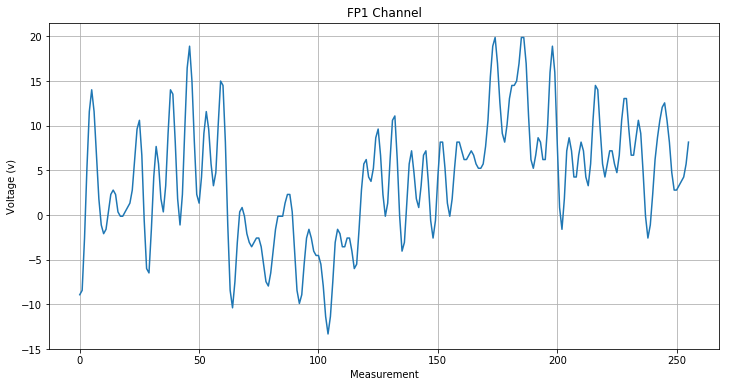

In [4]:
# Ref: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/
plt.rcParams['figure.figsize'] = [12, 6] #format graph size, else is a tiny plot

# load time and voltage data into x,y respectively for first channel in file (FP1)
x0 = data.iloc[0:256, 1] # grab first 256 rows in col 1
y0 = data.iloc[0:256, 2] # grab first 256 rows in col 2

# Note: dataframes are zero indexed

# plot x y
plt.plot(x0, y0)

# customize plot
plt.grid()
plt.ylabel('Voltage (v)')
plt.xlabel('Measurement')
plt.title('FP1 Channel')
plt.show()


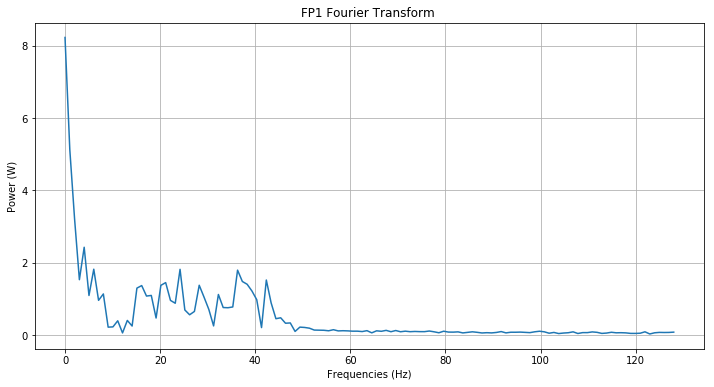

In [5]:
# each y measurement was measured 3.9msec appart (256Hz), for 1 sec.
plt.rcParams['figure.figsize'] = [12, 6]

# P,N are used to compute FFT with the correct frequencies
P = 1.0 / 256.0 # sampling space (period)
N = 256         # number of samples

# get fft
yf =  fft(y0)
xf = np.linspace(0.0, 1.0/(2.0*P), N//2) # create array of frequencies in x axis (0-128Hz)

# plot it
# yf is dtype=complex, need to get absolut value to convert to real (req. to plot)
# also, yf has 256 values, but we only need from 0-128, the other half is a reflection (ignore it)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()
plt.ylabel('Power (W)')
plt.xlabel('Frequencies (Hz)')
plt.title('FP1 Fourier Transform ')
plt.show()


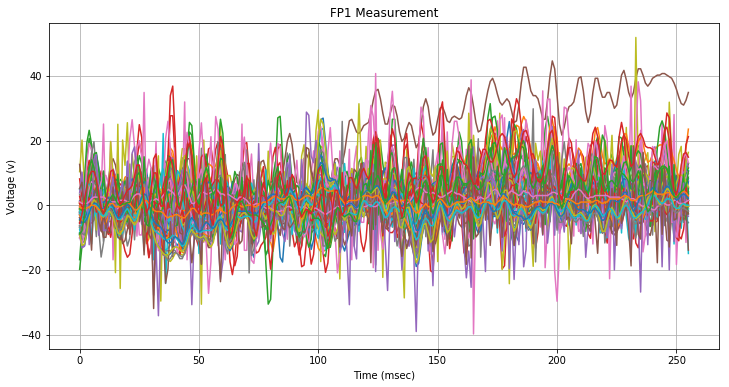

In [6]:
# lets try to read the 64 channels from a single csv file and plot em
plt.rcParams['figure.figsize'] = [12, 6]

# create empty arrays
x_s0 = np.empty([64, 256])
y_s0 = np.empty([64, 256])

# store channels in respective array indexi
for i in range(64):
    start = i*256
    end = (i+1)*256
    x_s0[i] = data.iloc[start:end, 1]
    y_s0[i] = data.iloc[start:end, 2]

# plot these lil bitches
for i in range(64):
    plt.plot(x_s0[0], y_s0[i])

plt.grid()
plt.ylabel('Voltage (v)')
plt.xlabel('Time (msec)')
plt.title('FP1 Measurement')
plt.show()

#nasty

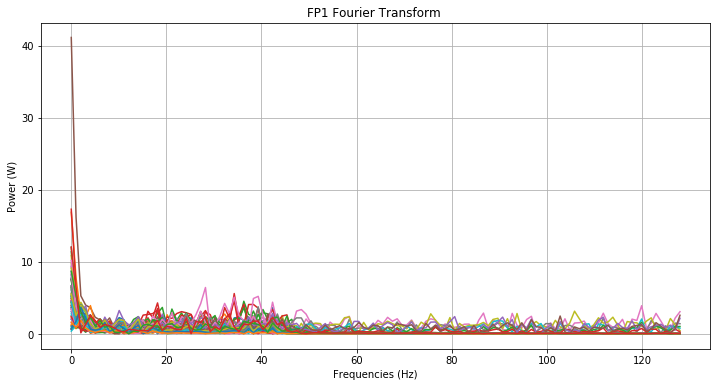

In [7]:
# lets try to plot the FFT for the 64 channels at once
plt.rcParams['figure.figsize'] = [12, 6]

# create empty array with dtype=complex
yf_s0 = np.empty([64,256], dtype=complex)

# compute and store fft for each channel
for i in range(64):
    yf_s0[i] = fft(y_s0[i])
    
# plot each channel
for i in range(64):
    plt.plot(xf, 2.0/N * np.abs(yf_s0[i][0:N//2]))
    
plt.grid()
plt.ylabel('Power (W)')
plt.xlabel('Frequencies (Hz)')
plt.title('FP1 Fourier Transform ')
plt.show()

#nastier

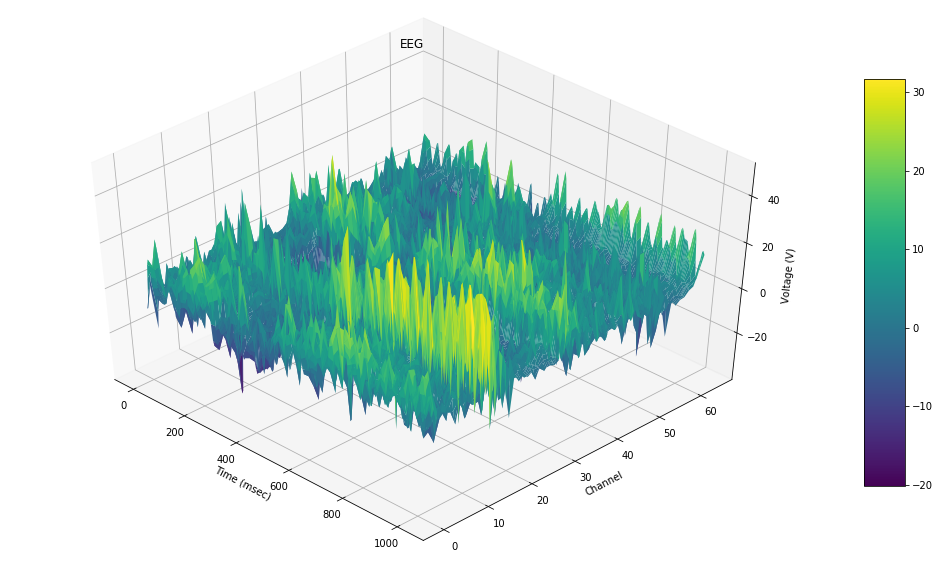

In [8]:
# reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d
#%matplotlib notebook 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [18, 10]


# prepare data
y = np.arange(0, 64, 1)
x = np.arange(0, 1024, 4)
X, Y = np.meshgrid(x,y)
Z = y_s0

# plot figure
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#plt.figure(figsize=(6, 6), dpi=80)

ax.set_xlabel('Time (msec)')
ax.set_ylabel('Channel')
ax.set_zlabel('Voltage (V)')
ax.set_title('EEG')

ax.view_init(45, -45) #changes view point

fig.colorbar(surf, shrink=0.75, aspect=10)

plt.show()

#behold 1 EEG

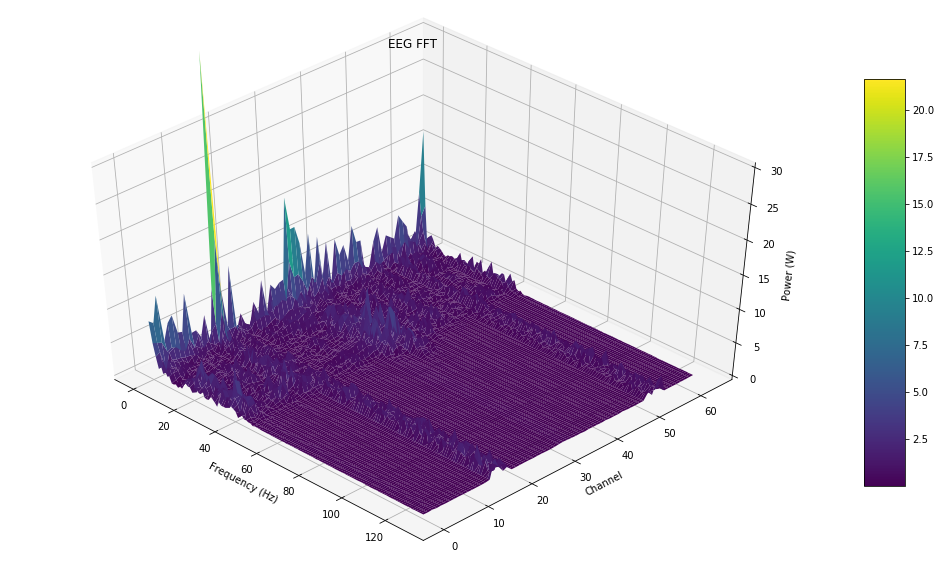

In [10]:
plt.rcParams['figure.figsize'] = [18, 10]

# prepare data
N = 256
y = np.arange(0, 64, 1) #64 fucking channels
x = np.linspace(0.0, 128.0, 128) #128 freqz

X, Y = np.meshgrid(x,y)
Z = 2.0/N * np.abs(yf_s0[:, 0:N//2])

# plot figure
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# customize graph
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Channel')
ax.set_zlabel('Power (W)')
ax.set_title('EEG FFT')

# Customize the z axis.
ax.set_zlim(0, 30)

# change viewpoint and add bar
ax.view_init(45, -45)
fig.colorbar(surf, shrink=0.75, aspect=10)

plt.show()

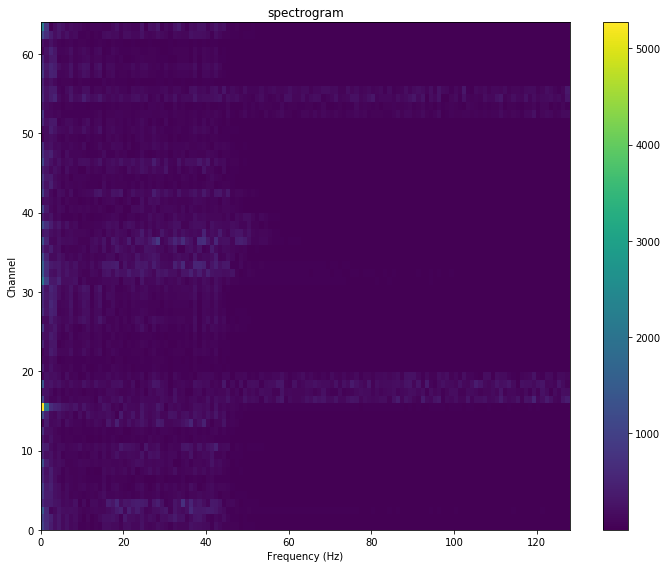

In [11]:
from matplotlib.colors import LogNorm

plt.rcParams['figure.figsize'] = [10, 8]
fig, ax0 = plt.subplots(1, 1)
Z = np.abs(yf_s0[:,0:128])

c = ax0.pcolor( Z )

ax0.set_title('spectrogram')
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Channel')

fig.tight_layout()
fig.colorbar(c, ax=ax0)
plt.show()

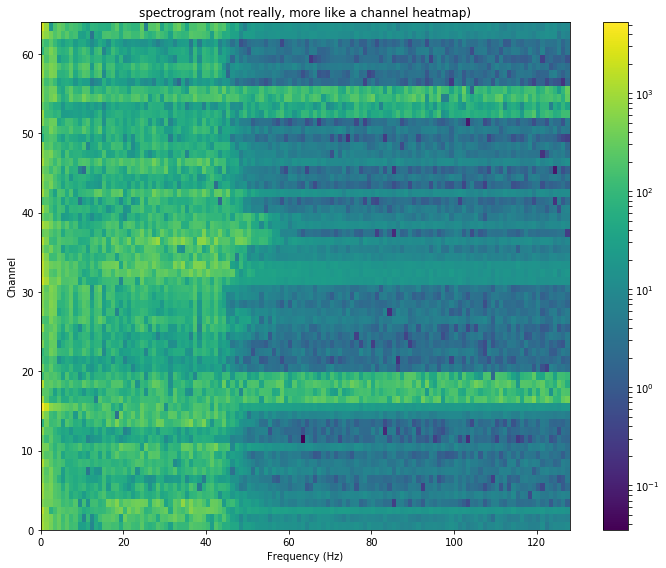

In [12]:
plt.rcParams['figure.figsize'] = [10, 8]
fig, ax0 = plt.subplots(1, 1)

# can change range of frequency vales by replacing 128 with 64. produces (64x64) plot
Z = np.abs(yf_s0[:,0:128])

c = ax0.pcolor( Z, norm=LogNorm(vmin=Z.min(), vmax=Z.max()) )

ax0.set_title('spectrogram (not really, more like a channel heatmap)')
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Channel')

fig.tight_layout()
fig.colorbar(c, ax=ax0)
plt.show()